In [177]:
import numpy as np
import matplotlib.pylab as plt
import math
import scipy.stats as sps
import pandas as pd
import seaborn as sns

%matplotlib inline

# Задача 1

In [178]:
theta = 1.
seed = 125
N = 100

np.random.seed(seed) #для воспроизводимости результата
data_sample = np.random.normal(0., theta, N) #получаем случайную выборку из N[0, teta = 1]



Найдём оценку по методу правдоподобия.
Доминируемое семейство распределений, по условию, $\mathcal{P} = \{\mathcal{N}(0, \theta), \theta \in R_+\}$. Функция правдоподобия выборки:
$$f_\theta(X_1, \dots, X_N)=\prod\limits_{n=1}^{N} \frac{1}{\sqrt{2\pi\theta}}\exp\Bigg(-{\frac{X_n^2}{2\theta}}\Bigg)
=\frac{1}{\sqrt{2\pi\theta}^N}\exp\Bigg(-\frac{\sum\limits_{n=1}^N X_n^2}{2\theta}\Bigg).$$
Тогда логарифмическая функция правдоподобия:
$$L_\theta(X_1, \dots, X_N) = -\frac{N}{2}\ln(2\pi\theta)-\frac{\sum\limits_{n=1}^N X_n^2}{2\theta}.$$
Найдя её производную по $\theta$ и приравняв нулю, мы получим оценку:
$$\theta_{MLE}=\overline{X^2}.$$
Посчитаем её.

In [179]:
theta_MLE = np.mean(data_sample**2) #MLE - Maximum likelihood estimation
print(theta_MLE)

0.993352755539


##### Вывод 1
Полученное значение на данной выборке близко к настаящему (отклонение менее, чем на 1%). На других выборках при том же числе испытаний он может откланяться более существенно (более 7%).

Построим теперь Байесовскую оценку. Сопряжённым является семейство распределений $\mathcal{N}(a,\sigma^2)$.
По определению, $\theta_{BE}={\bf E}(\theta|X)$. Для нахождения оценки нам нужно вычислить плотность условного распределения:
$$p_{\theta|X}(t|x)=\frac{q(t)p_t(x)}{\int\limits_\Theta q(u)p_u(x)du}.$$
Подставляя нужные распределения в формулы, можно получить результат:
$$\theta_{BE}=\frac{a+\overline{X}n\sigma^2}{1+n\sigma^2}.$$
Подробные выкладки не приводятся, так как задача о нахождении оценки взята из домашней работы, а именно из задачи 7.4(а).

Построим для 5 пар значений графики.

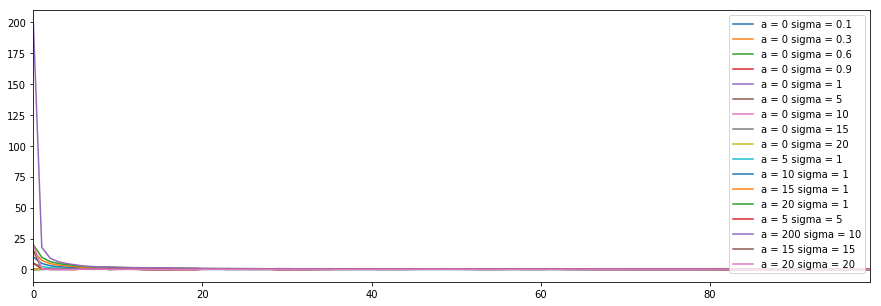

In [180]:
estimator_values = [
    (0, 0.1),
    (0, 0.3),
    (0, 0.6),
    (0, 0.9),
    (0, 1),
    (0, 5),
    (0, 10),
    (0, 15),
    (0, 20),
    (5, 1),
    (10, 1),
    (15, 1),
    (20, 1),
    (5, 5),
    (200, 10),
    (15, 15),
    (20, 20)
    
] #(a, sigma2)

mean_x = lambda n: np.mean((data_sample)[0 : n + 1])


graph_data = pd.DataFrame({})
for (a, sigma2) in estimator_values:
    name = "a = " + str(a) + " sigma = " + str(sigma2)
    #вычисли среднее на каждом шаге:
    estimator_values = []
    for i in range(N):
        estimator_values.append(abs((a + mean_x(i) * i * sigma2) / (1 + i * sigma2)))
    this_values_data = pd.DataFrame({ name: estimator_values})
    graph_data = pd.concat([graph_data, this_values_data], axis=1)
    
graph_data.plot(figsize = (15, 5))
plt.show()

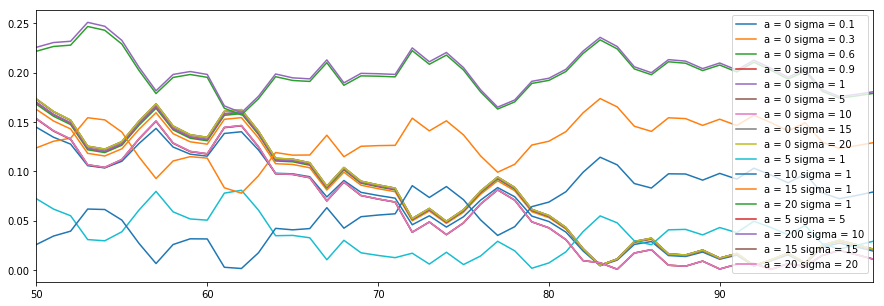

In [181]:
(graph_data[N//2: ]).plot(figsize = (15, 5))
plt.show()
#то же самое с половины испытаний

Значения на полной ввыборке:

In [182]:
graph_data.loc[N-1, :]

a = 0 sigma = 0.1     0.019124
a = 0 sigma = 0.3     0.020370
a = 0 sigma = 0.6     0.020707
a = 0 sigma = 0.9     0.020822
a = 0 sigma = 1       0.020845
a = 0 sigma = 5       0.021013
a = 0 sigma = 10      0.021034
a = 0 sigma = 15      0.021042
a = 0 sigma = 20      0.021045
a = 5 sigma = 1       0.029155
a = 10 sigma = 1      0.079155
a = 15 sigma = 1      0.129155
a = 20 sigma = 1      0.179155
a = 5 sigma = 5       0.010933
a = 200 sigma = 10    0.180782
a = 15 sigma = 15     0.010947
a = 20 sigma = 20     0.010949
Name: 99, dtype: float64

### Вывод 2
Можно сказать, что все оценки достаточно неплохо находят значение $\theta$: по первому графику видно, что оценки устремляются к реальному значению. Почти на всех выборках лучше всего показали себя оценки с ненулевым матожиданием сопряжённого распределения (параметром $a$).

### Вывод 3
Почти во всех случаях байесовская оценка показала себя хуже (в плане процентного откланения от истинного значения), чем оценка при помощи функции правдободобия.

# Задача 2

Сопряжённым априорным распределением является бета распределение. Постороим его графики для некоторых пар параметров.

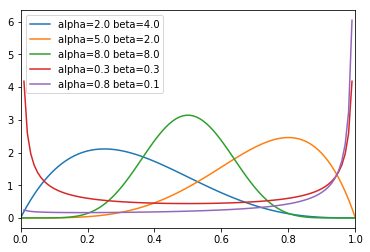

In [183]:
beta_distr_parameters = [
    (2., 4.),
    (5., 2.),
    (8., 8.),
    (0.3, 0.3),
    (0.8, 0.1)    
] #(alpha, beta)

x = np.linspace(0.,1.,100)


distr_functions = pd.DataFrame({})
for (a, b) in beta_distr_parameters:
    distr_function_i = pd.DataFrame({ "alpha=" + str(a) + " beta=" + str(b) : sps.beta.pdf(x, a, b)}, index=x)
    distr_functions = pd.concat([distr_functions, distr_function_i], axis=1)
distr_functions.plot()

Максимумы функций соответствуют наиболее вероятным значениям. Максимум в 0.5 подразумевает высокую вероятность симметрии монеты, как в случае (8, 8). Оценки с минимумом в близи 0.5 подразумевают несимметричность монеты, так как наиболее вероятны значения вне среднего. Если максимум смещён относительно 0.5 сильно, то монету можно считать несимметричной. 

Формула байесовской оценки:
    
$$\theta_{б}=\frac{\alpha + n\overline{X}}{\alpha + \beta + n}.$$

Оценка максимального правдоподобия из матожидания: 

$$\theta_п=\overline{X}$$

In [185]:
#получим для разных монет выборки
bern_params = [0.1, 0.45, 0.55, 0.9]
N = 20 #число испытаний

seed = 1221
np.random.seed(seed)

data = pd.DataFrame({})
for i in bern_params:
    this_values_data = pd.DataFrame({"p=" + str(i): [np.random.binomial(1, i) for j in range(N)]}, index=range(N))
    data = pd.concat([data, this_values_data], axis=1)
print("Число удачных исходов из " + str(N) + " в каждой из выборок")
data.sum()

Число удачных исходов из 20 в каждой из выборок


p=0.1      1
p=0.45     8
p=0.55     9
p=0.9     19
dtype: int64

In [186]:

estimators_data = []

for i in bern_params:
    estimators_for_ith_coin = pd.DataFrame({})
    for (a, b) in beta_distr_parameters:
        est = pd.DataFrame({ "Байесовская с a=" + str(a) + " b=" + str(b) +")" :
                            [abs(i - (a + sum(data["p="+str(i)][:j].values) / (a + b + j))) for j in range(1, N+1)]},
                           index=range(1, N+1))
        estimators_for_ith_coin = pd.concat([estimators_for_ith_coin, est], axis=1)
    est_p = pd.DataFrame({ "Правдоподобия" :
                            [abs(i - (sum(data["p="+str(i)][:j].values) / j)) for j in range(1, N+1)] },
                           index=range(1, N+1))
    estimators_for_ith_coin = pd.concat([estimators_for_ith_coin, est_p], axis=1)
    estimators_data.append(estimators_for_ith_coin)

p=0.1


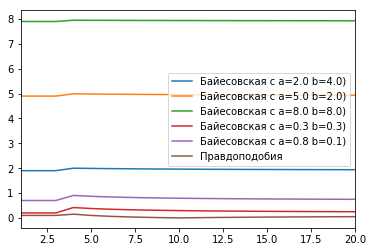

In [187]:
i = 0
print("p=" + str(bern_params[i]))
estimators_data[i].plot()

p=0.45


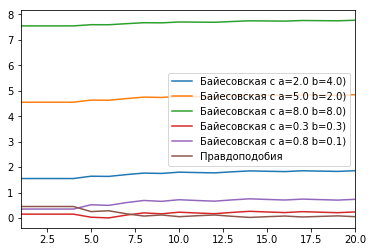

In [188]:
i = 1
print("p=" + str(bern_params[i]))
estimators_data[i].plot()

p=0.55


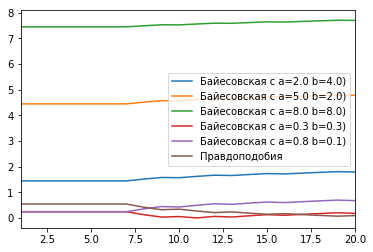

In [189]:
i = 2
print("p=" + str(bern_params[i]))
estimators_data[i].plot()

p=0.9


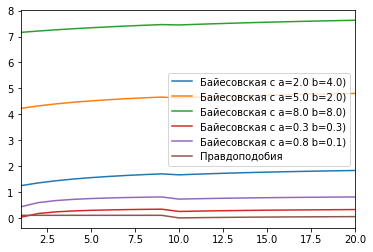

In [190]:
i = 3
print("p=" + str(bern_params[i]))
estimators_data[i].plot()